In [1]:
from google.colab import drive
drive.mount('/drive', force_remount=True)

%cd '/drive/MyDrive/Colab Notebooks/INF2190/INF2190 Final Project/'

Mounted at /drive
/drive/MyDrive/Colab Notebooks/INF2190/INF2190 Final Project


In [7]:
# import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn import tree

In [25]:
# load the merged and cleaned data
df_og = pd.read_csv('data/billboard-merged.csv')

df = df_og.copy()
df.head()

,chart_week,current_week,title,performer,wks_on_chart,USREC,song_artist_followers,song_len_ms,song_explicity,track_release_date,...,song_modality,song_speechiness,song_tempo,song_time_signature,song_valence,lyrics,lyrics_tokenized,stop_words_ratio,title_tokenized,sentiment_compound_score
0,2022-01-01,1,All I Want For Christmas Is You,Mariah Carey,50,0,10615871.0,241106.0,False,1994-10-28,...,1.0,0.0384,150.273,4.0,0.350,I don't want a lot for Christmas\nThere is jus...,i want lot christma there one thing i need i c...,0.571038,all i want for christma is you,0.9914
1,2022-01-01,2,Rockin' Around The Christmas Tree,Brenda Lee,44,0,402651.0,126266.0,False,1964-10-19,...,1.0,0.0496,67.086,4.0,0.879,Rockin' around the Christmas tree\nAt the Chri...,rockin around christma tree at christma parti ...,0.431034,rockin around the christma tree,0.5994
2,2022-01-01,3,Jingle Bell Rock,Bobby Helms,41,0,50675.0,130973.0,False,1957-12-02,...,1.0,0.0363,119.705,4.0,0.806,"Jingle bell, jingle bell, jingle bell rock\nJi...",jingl bell jingl bell jingl bell rock jingl be...,0.290503,jingl bell rock,0.8442
3,2022-01-01,4,A Holly Jolly Christmas,Burl Ives,25,0,102952.0,135533.0,False,1965-10-01,...,1.0,0.0303,140.453,4.0,0.888,Ding-dong-ding\nDing-dong-ding\n\nHave a holly...,have holli jolli christma it best time year i ...,0.490566,a holli jolli christma,0.9847
4,2022-01-01,5,Easy On Me,Adele,11,0,60150219.0,224694.0,False,2021-10-14,...,1.0,0.0282,141.981,4.0,0.130,There ain't no gold in this river\nThat I've b...,there ai gold river that i wash hand forev i k...,0.528846,easi on me,0.4580


In [26]:
# decide categorical variables
# song_explicity - convert 0 for false and 1 for true
df['song_explicity'] = df['song_explicity'].apply(lambda x: 1 if x == 1 else 0)

# song_danceability - convert to < 0.5: low danceability and > 0.5: high danceability
df['song_danceability'] = df['song_danceability'].apply(lambda x: 'Low' if x <= 0.5 else 'High')

# song_mode - 1 if the song is in major key and 0 if the song is in minor key
df['song_modality'] = df['song_modality'].astype('int64')

# sentiment_compound score - negative if score < 0 and positive if score >= 0
df['sentiment_compound_score'] = df['sentiment_compound_score'].apply(lambda x: 'Negative' if x < 0 else 'Positive')

# stop_words_ratio - high usage of stop words if ratio > 0.5, low usage of stop words <= 0.5
df['stop_words_ratio'] = df['stop_words_ratio'].apply(lambda x: 'Low' if x <= 0.5 else 'High')

df_selected = df[['USREC', 'song_explicity', 'song_danceability', 'song_modality', 'sentiment_compound_score', 'stop_words_ratio']]
df_selected.head()

,USREC,song_explicity,song_danceability,song_modality,sentiment_compound_score,stop_words_ratio
0,0,0,Low,1,Positive,High
1,0,0,High,1,Positive,Low
2,0,0,High,1,Positive,Low
3,0,0,High,1,Positive,Low
4,0,0,High,1,Positive,High


In [27]:
col_names = df_selected.columns

for col in col_names:
    print(df[col].value_counts())

USREC
0    130425
1     12435
Name: count, dtype: int64
song_explicity
0    113177
1     29683
Name: count, dtype: int64
song_danceability
High    117816
Low      25044
Name: count, dtype: int64
song_modality
1    97095
0    45765
Name: count, dtype: int64
sentiment_compound_score
Positive    107678
Negative     35182
Name: count, dtype: int64
stop_words_ratio
High    99681
Low     43179
Name: count, dtype: int64


In [28]:
# Encode categorical variables
label_encoders = {}
for column in df_selected.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_selected[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split the data into features and target variable
X = df_selected.drop('USREC', axis=1)
y = df_selected['USREC']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

df_selected.head()

<ipython-input-28-773f68da9f7d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[column] = le.fit_transform(df[column])
<ipython-input-28-773f68da9f7d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[column] = le.fit_transform(df[column])
<ipython-input-28-773f68da9f7d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

,USREC,song_explicity,song_danceability,song_modality,sentiment_compound_score,stop_words_ratio
0,0,0,1,1,1,0
1,0,0,0,1,1,1
2,0,0,0,1,1,1
3,0,0,0,1,1,1
4,0,0,0,1,1,0


Basic Decision Tree Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     39031
           1       0.00      0.00      0.00      3827

    accuracy                           0.91     42858
   macro avg       0.46      0.50      0.48     42858
weighted avg       0.83      0.91      0.87     42858

Depth: 2, Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     39031
           1       0.00      0.00      0.00      3827

    accuracy                           0.91     42858
   macro avg       0.46      0.50      0.48     42858
weighted avg       0.83      0.91      0.87     42858

Depth: 3, Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     39031
           1       0.00      0.00      0.00      3827

    accuracy                           0.91     42858
   macro avg       0.46      0.50      0.48

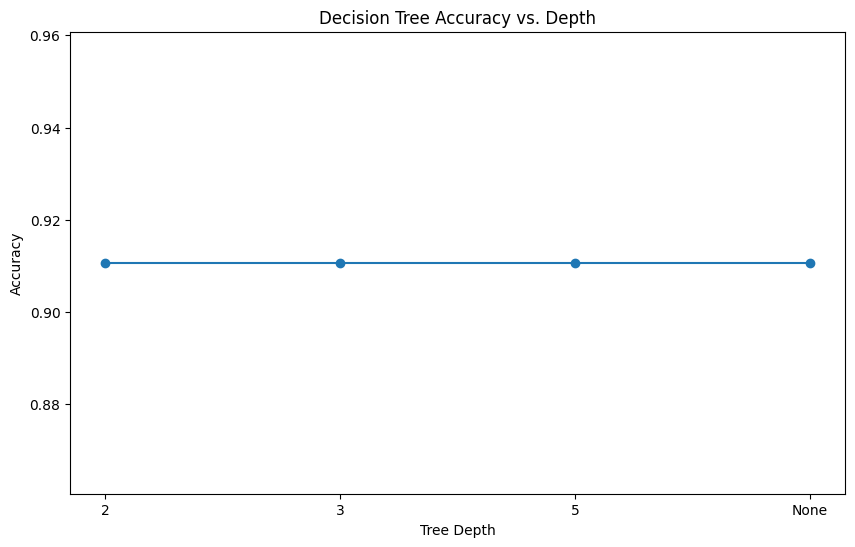

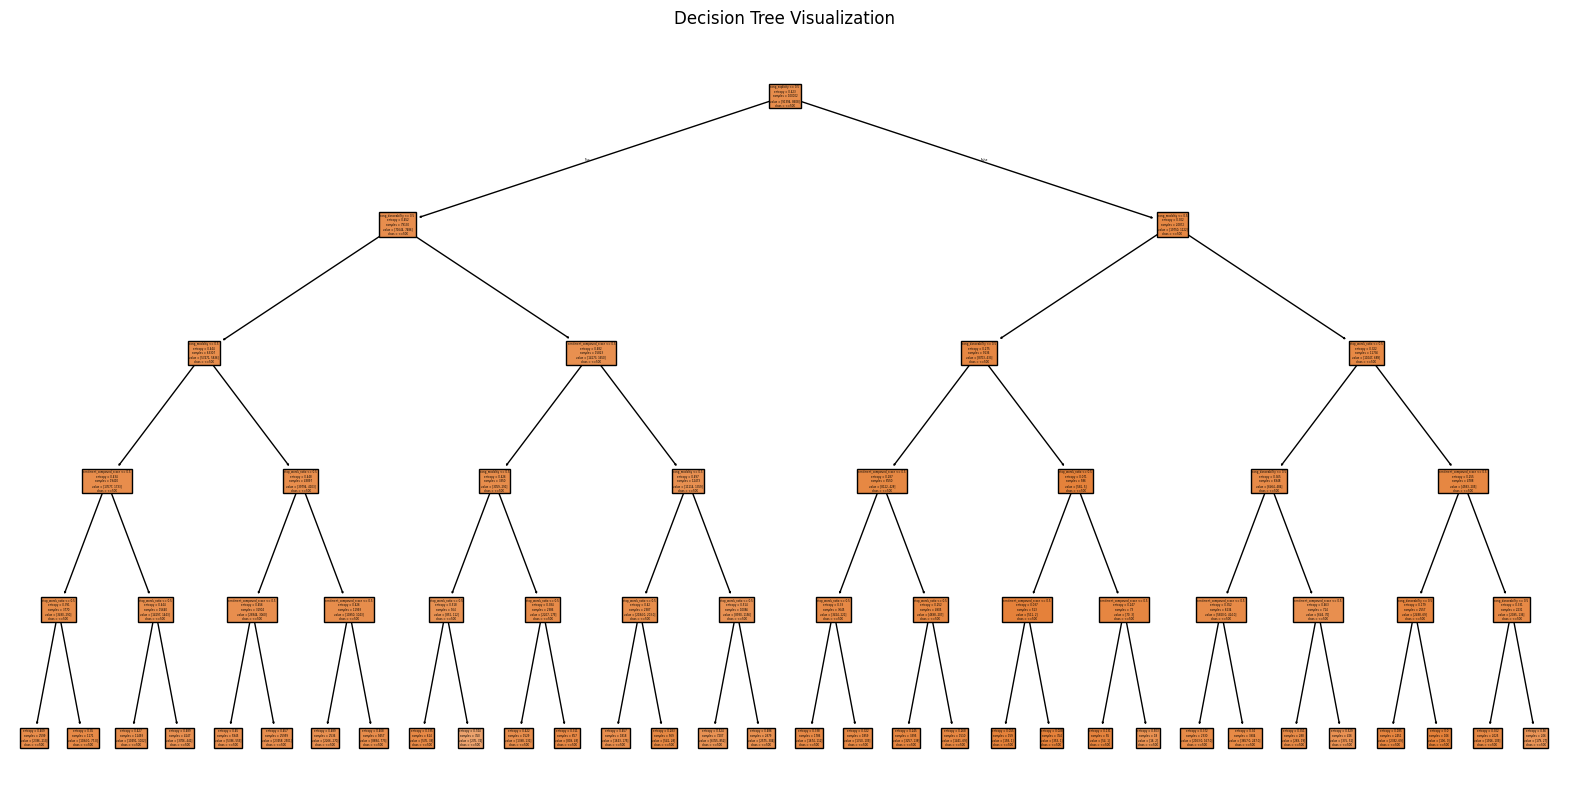

In [31]:
# Step 1: Train a basic Decision Tree
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

# Step 2: Predict on test data and measure accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Basic Decision Tree Accuracy: {accuracy:.2f}')
# Use zero_division=0 to handle undefined metrics
print(classification_report(y_test, y_pred, zero_division=0))

# Step 3: Experiment with different tree depths
depths = [2, 3, 5, None]
accuracies = []
for depth in depths:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f'Depth: {depth}, Accuracy: {acc:.2f}')
    print(classification_report(y_test, y_pred, zero_division=0))

# Step 4: Plot accuracies vs. tree depths
plt.figure(figsize=(10, 6))
plt.plot([str(d) for d in depths], accuracies, marker='o')
plt.title('Decision Tree Accuracy vs. Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.show()

# Step 5: Visualize the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['<=50K', '>50K'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()


                    Feature  Information Gain
0            song_explicity          0.512527
4          stop_words_ratio          0.186291
3  sentiment_compound_score          0.128804
1         song_danceability          0.108631
2             song_modality          0.063747


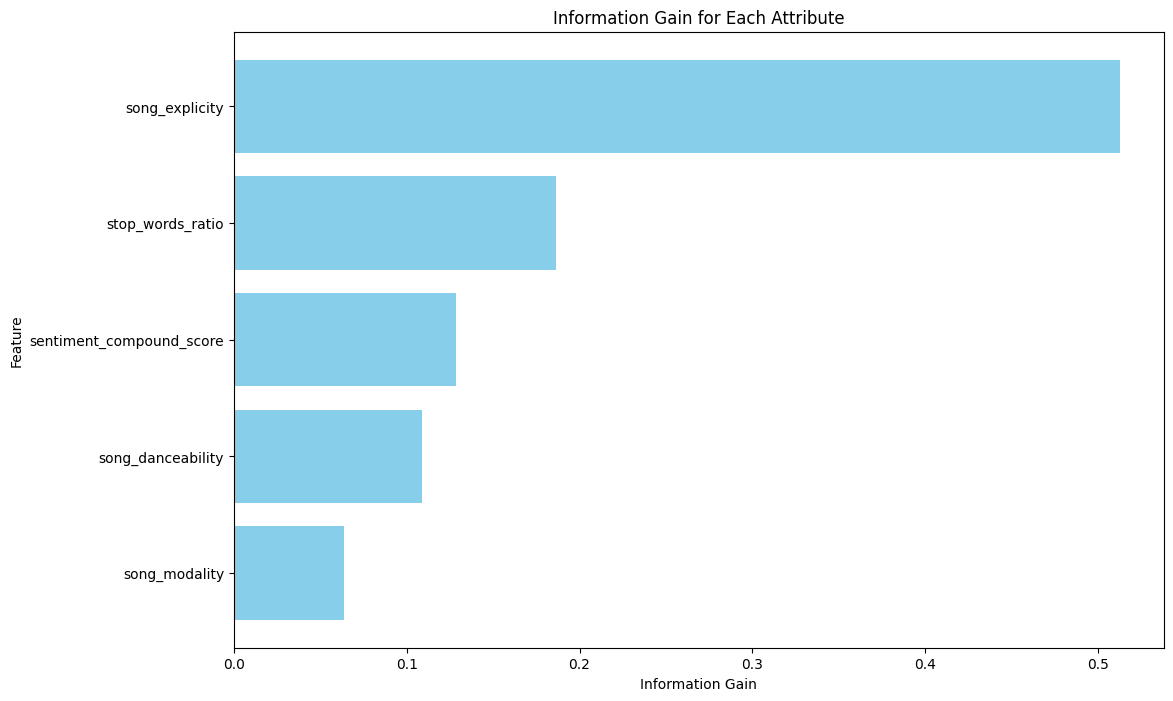

In [32]:
# Assuming the data has already been preprocessed and split into X_train, y_train
# If not, preprocess the data using the previously provided code snippet

# Train a Decision Tree classifier using Information Gain (entropy)
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

# Extract feature importances (Information Gain) from the model
information_gain = clf.feature_importances_

# Create a DataFrame to display feature names and their Information Gain
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Information Gain': information_gain
}).sort_values(by='Information Gain', ascending=False)

# Display the DataFrame
print(feature_importance_df)

# Plot the Information Gain for each feature
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Information Gain'], color='skyblue')
plt.xlabel('Information Gain')
plt.ylabel('Feature')
plt.title('Information Gain for Each Attribute')
plt.gca().invert_yaxis()
plt.show()